In [1]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
plt.style.use('fivethirtyeight')

In [2]:
import yfinance as yf

In [3]:
#c = CurrencyRates()
#currency_rate = c.get_rate('USD', 'INR')

In [7]:
## getting the stock data
df = yf.download("WIPRO.NS", start='2012-01-01', end='2023-04-28')

[*********************100%***********************]  1 of 1 completed


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,149.625031,150.712540,148.275040,149.625031,134.066666,1708458
2012-01-03,150.881287,156.712540,150.506287,156.187546,139.946823,5764897
2012-01-04,157.012543,159.375046,155.756287,156.843796,140.534836,5075777
2012-01-05,155.887543,158.587540,154.200043,155.606293,139.426025,3031457
2012-01-06,154.856293,154.856293,151.162537,152.156281,136.334717,3327636
...,...,...,...,...,...,...
2023-04-13,369.899994,369.899994,366.000000,368.299988,368.299988,3362317
2023-04-17,359.950012,361.950012,352.000000,361.350006,361.350006,6801645
2023-04-18,363.450012,368.899994,359.250000,367.899994,367.899994,4012449


In [9]:
#df['Close_INR'] = np.multiply(df['Close'], currency_rate) 

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,149.625031,150.712540,148.275040,149.625031,134.066666,1708458
2012-01-03,150.881287,156.712540,150.506287,156.187546,139.946823,5764897
2012-01-04,157.012543,159.375046,155.756287,156.843796,140.534836,5075777
2012-01-05,155.887543,158.587540,154.200043,155.606293,139.426025,3031457
2012-01-06,154.856293,154.856293,151.162537,152.156281,136.334717,3327636
...,...,...,...,...,...,...
2023-04-13,369.899994,369.899994,366.000000,368.299988,368.299988,3362317
2023-04-17,359.950012,361.950012,352.000000,361.350006,361.350006,6801645
2023-04-18,363.450012,368.899994,359.250000,367.899994,367.899994,4012449


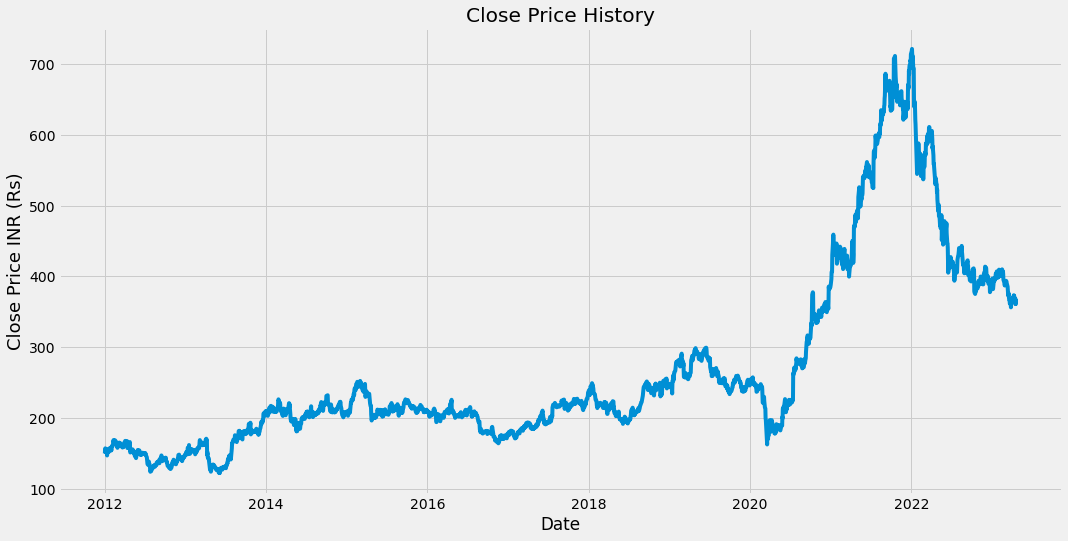

In [11]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.show()

In [12]:
# Create a dataframe of only one column Close
data = df[['Close']]
# Convert a dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
# training on 80% of data
training_data_len = math.ceil(len(dataset)*0.8)

In [13]:
print(len(dataset), training_data_len)

2786 2229


In [14]:
#Scaling the dataset in range [0, 1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04630875],
       [0.05725278],
       [0.05834718],
       ...,
       [0.4103165 ],
       [0.39847613],
       [0.40189486]])

In [15]:
scaled_data.shape

(2786, 1)

In [16]:
# Create a scaled training dataset
train_data = scaled_data[:training_data_len, 0]

In [17]:
train_data[2:7]

array([0.05834718, 0.05628345, 0.05053001, 0.04765332, 0.0491542 ])

In [18]:
# Split the data into x_train and y_train
x_train, y_train = [], []
for i in range(60, training_data_len):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])


In [19]:
len(y_train), training_data_len, len(x_train)

(2169, 2229, 2169)

In [20]:
# Convert the x_train and y_train to np array
y_train = np.array(y_train)
x_train = np.array(x_train)

In [21]:
x_train.shape

(2169, 60)

In [22]:
# Reshape the data in 3D, LSTM needs 3d data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2169, 60, 1)

In [23]:
# Build LSTM model
model = Sequential()
# model with 50 neurons
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [24]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2169/2169 [==============================] - 76s 35ms/step - loss: 1.7308e-04


In [30]:
# Creating a test dataset
test_data = scaled_data[training_data_len-60:, 0]
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i])
    


In [31]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [32]:
# Reshape to 3d as LSTM expects 3d
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
x_test.shape

(557, 60, 1)

In [34]:
# Get the models predicted price values
predictions = model.predict(x_test)

18/18 [==============================] - 2s 25ms/step


In [35]:
# unscaling the scaled values
predictions = scaler.inverse_transform(predictions)

In [36]:
len(predictions)

557

In [37]:
# Get the root mean squared values (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

24.337748940157933

C:\Users\A5039\AppData\Local\Temp\ipykernel_22364\3766810210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


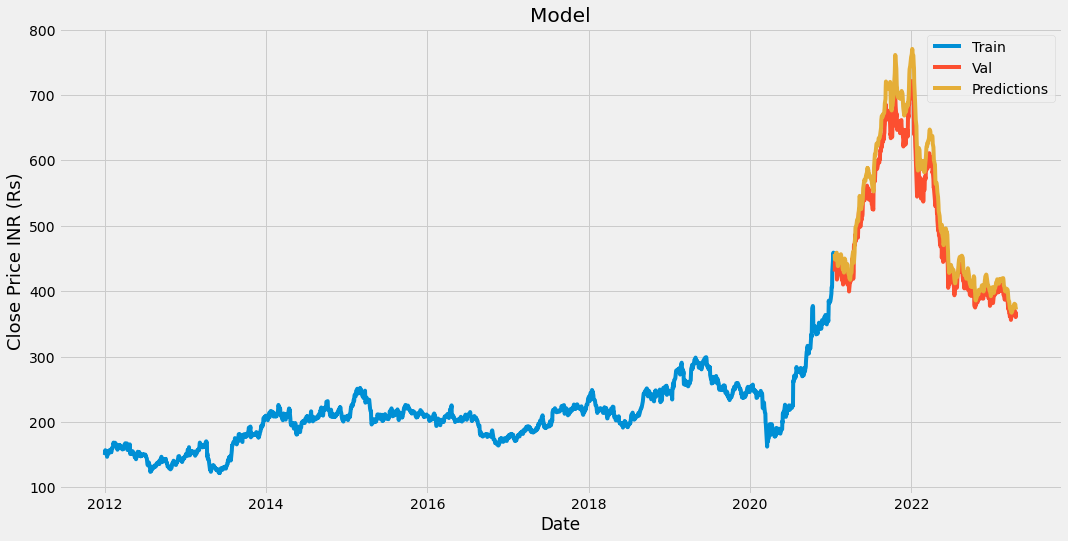

In [38]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price INR (Rs)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [39]:
valid

,Close,Predictions
Date,,
2021-01-19,430.250000,456.784180
2021-01-20,444.950012,448.518158
2021-01-21,445.799988,450.144348
2021-01-22,444.750000,454.374573
2021-01-25,437.250000,457.734711
...,...,...
2023-04-13,368.299988,380.867218
2023-04-17,361.350006,379.618927
2023-04-18,367.899994,375.464539


In [40]:
## getting the stock data
#wipro = yf.download("WIT", start='2012-01-01', end='2023-04-22')


In [41]:
# Filter the Close column
df = df[['Close']]
# take last 60 days closing price and convert to array
last_60_days = df[-60:].values 
# scale the data to the value between [0,1]
last_60_days_scaled = scaler.transform(last_60_days)
# create test data
x_test = []
# append the last 60 days closing price
x_test.append(last_60_days_scaled)
# convert x_test to numpy array
x_test = np.array(x_test)
# reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get the predicted value
pred_price = model(x_test)
# unscale the pred_price 
pred_price = scaler.inverse_transform(pred_price)

In [42]:
pred_price

array([[370.88035205]])

In [ ]:
c = CurrencyRates()
c.get_rate('USD', 'INR')